<a href="https://colab.research.google.com/github/MaikiSoft/ApiDjango/blob/main/Transfer_Learning_Emociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf /content/datas/llorando.zip
!rm -rf /content/data/estresados.zip


In [ ]:
!unzip /contect/data/estresado

In [5]:
!mkdir data_temp

In [7]:
!unzip /content/data_temp/llorando.zip -d /content/dataset/

Archive:  /content/data_temp/llorando.zip
   creating: /content/dataset/llorando/
  inflating: /content/dataset/__MACOSX/._llorando  
  inflating: /content/dataset/llorando/images32.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images32.jpg  
  inflating: /content/dataset/llorando/image22.jpeg  
  inflating: /content/dataset/__MACOSX/llorando/._image22.jpeg  
  inflating: /content/dataset/llorando/images123.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images123.jpg  
  inflating: /content/dataset/llorando/ee9f2e51bafa08e6572c9234d03550be.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._ee9f2e51bafa08e6572c9234d03550be.jpg  
  inflating: /content/dataset/llorando/640px-Tears_.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._640px-Tears_.jpg  
  inflating: /content/dataset/llorando/images136.jpg  
  inflating: /content/dataset/__MACOSX/llorando/._images136.jpg  
  inflating: /content/dataset/llorando/pngtree-man-with-tears-and-tears-on-his-face-picture-

In [8]:
!unzip /content/data_temp/estresados.zip -d /content/dataset/

Archive:  /content/data_temp/estresados.zip
   creating: /content/dataset/estresados/
  inflating: /content/dataset/__MACOSX/._estresados  
  inflating: /content/dataset/estresados/-que-se-sienta-con-la-computadora-portC3A1til-y-la-cabeza-conmovedora-con-la.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._-que-se-sienta-con-la-computadora-portC3A1til-y-la-cabeza-conmovedora-con-la.jpg  
  inflating: /content/dataset/estresados/sad_woman_in_windowsill.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._sad_woman_in_windowsill.jpg  
  inflating: /content/dataset/estresados/image22.jpeg  
  inflating: /content/dataset/__MACOSX/estresados/._image22.jpeg  
  inflating: /content/dataset/estresados/collage-con-fotos-de-personas-estresadas-en-fondos-de-color-2n6r3mk.jpg  
  inflating: /content/dataset/__MACOSX/estresados/._collage-con-fotos-de-personas-estresadas-en-fondos-de-color-2n6r3mk.jpg  
  inflating: /content/dataset/estresados/estres-laboral-daC3B1o-salud-empresa-estudi

In [15]:
!rm /content/dataset/estresados/.DS_Store -r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
import shutil

In [38]:
!ls /content/dataset/llorando | wc -l #475
!ls /content/dataset/estresados | wc -l #515


185
143


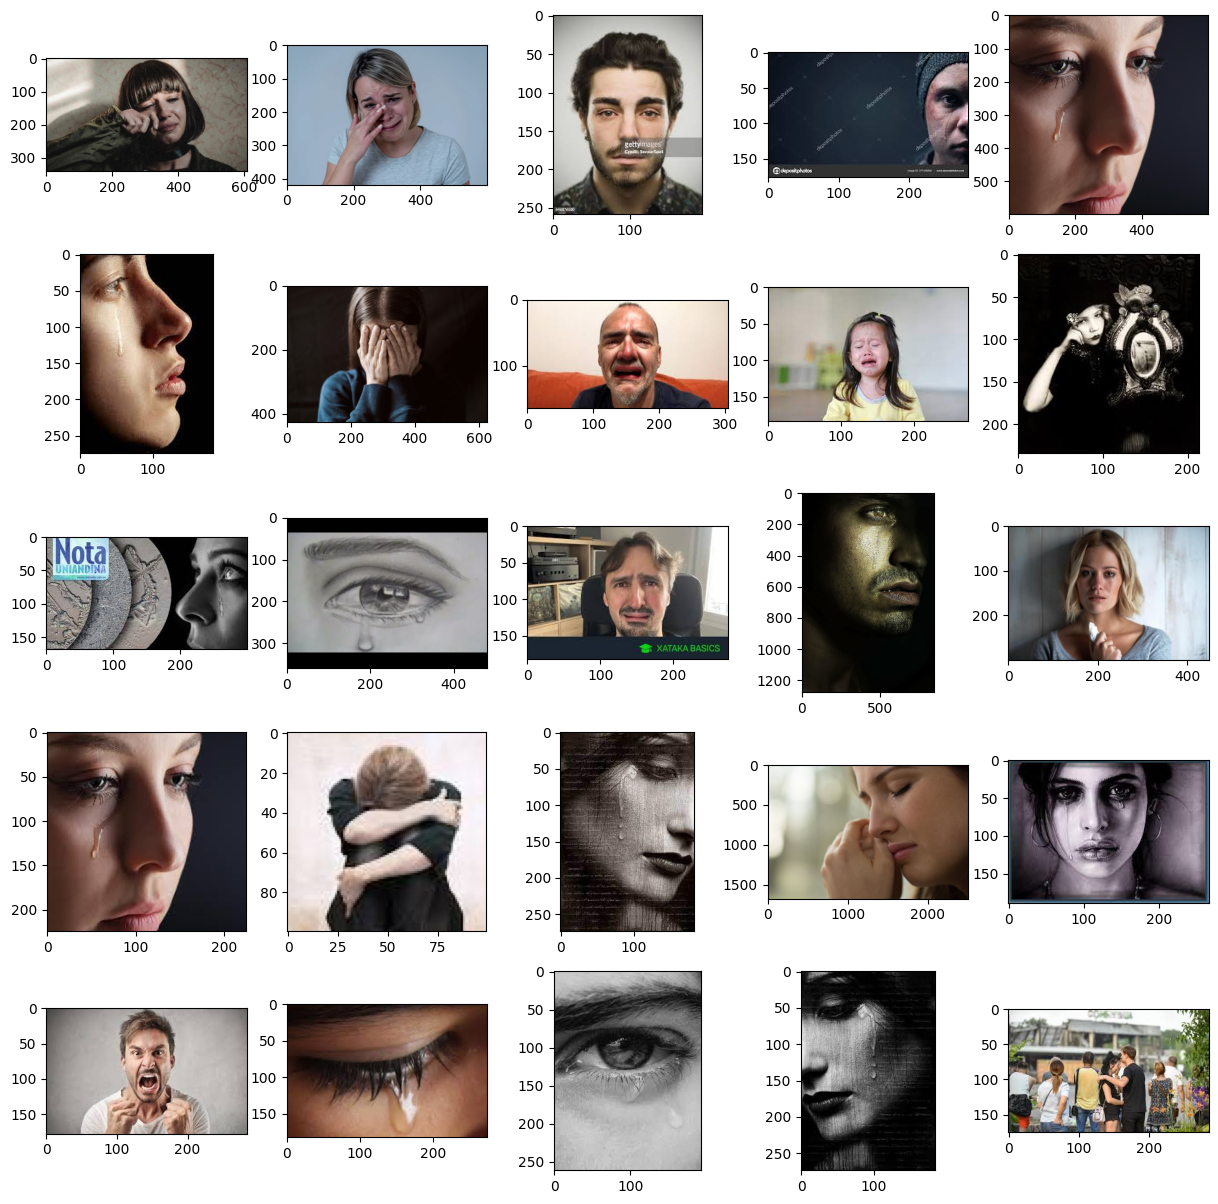

In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/dataset/llorando'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

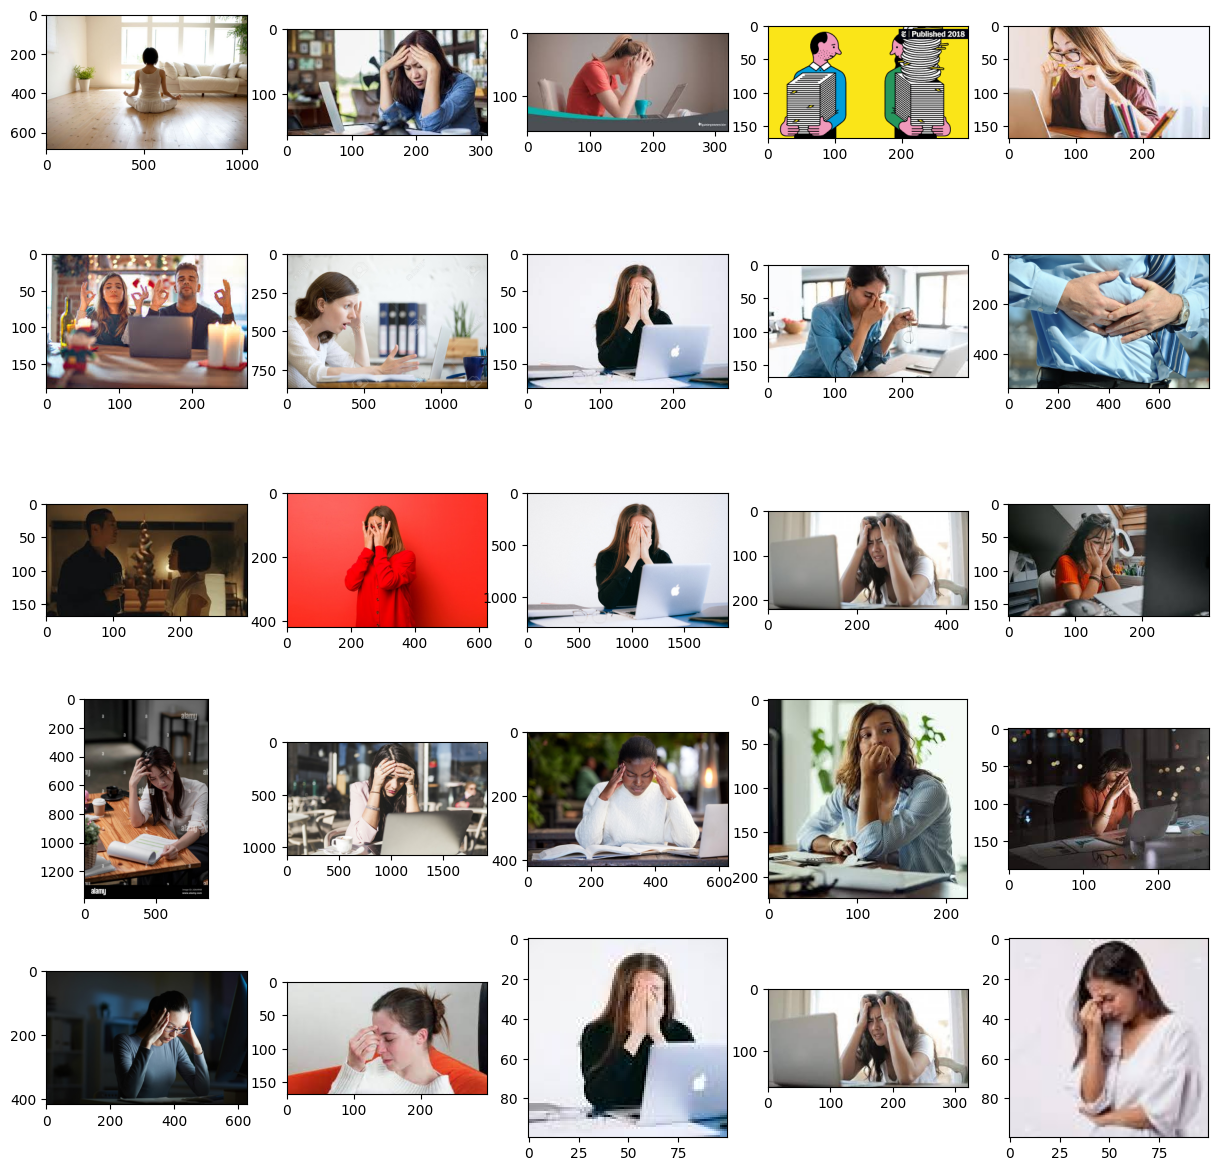

In [16]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/dataset/estresados'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [19]:
carpeta_fuente = '/content/dataset/llorando'
carpeta_destino = '/content/dataset_limpio/llorando'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 80:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [22]:
carpeta_fuente = '/content/dataset/estresados'
carpeta_destino = '/content/dataset_limpio/estresados'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 80:
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [23]:
!ls /content/dataset_limpio/llorando | wc -l
!ls /content/dataset_limpio/estresados | wc -l


80
80


In [37]:
!ls -la /content/dataset_limpio/

total 16
drwxr-xr-x 4 root root 4096 Apr 11 22:19 .
drwxr-xr-x 1 root root 4096 Apr 11 21:55 ..
drwxr-xr-x 2 root root 4096 Apr 11 21:59 estresados
drwxr-xr-x 2 root root 4096 Apr 11 21:57 llorando


In [33]:
!rm /content/dataset_limpio/.ipynb_checkpoints/ -r

Found 128 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


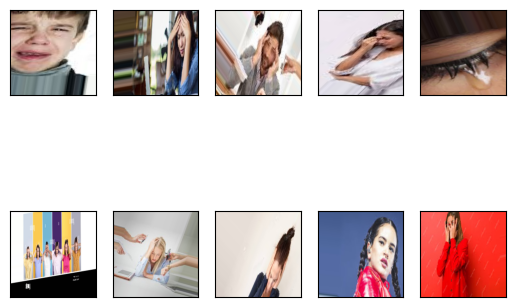

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2
)

data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset_limpio', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset_limpio', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [41]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [42]:
mobilenetv2.trainable = False

In [43]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [44]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [45]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [46]:
EPOCAS = 5

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/5
4/4 [==============================] - 40s 1s/step - loss: 0.7306 - accuracy: 0.5859 - val_loss: 0.7094 - val_accuracy: 0.7097
Epoch 2/5
4/4 [==============================] - 4s 1s/step - loss: 0.5827 - accuracy: 0.6719 - val_loss: 0.4988 - val_accuracy: 0.7742
Epoch 3/5
4/4 [==============================] - 3s 697ms/step - loss: 0.4666 - accuracy: 0.7500 - val_loss: 0.3224 - val_accuracy: 0.9032
Epoch 4/5
4/4 [==============================] - 3s 681ms/step - loss: 0.4294 - accuracy: 0.7891 - val_loss: 0.3727 - val_accuracy: 0.8387
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 0.3010 - accuracy: 0.8516 - val_loss: 0.3981 - val_accuracy: 0.7419


In [31]:
!ls -la

total 32
drwxr-xr-x 1 root root 4096 Apr 11 21:55 .
drwxr-xr-x 1 root root 4096 Apr 11 21:39 ..
drwxr-xr-x 4 root root 4096 Apr 11 03:24 .config
drwxr-xr-x 4 root root 4096 Apr 11 21:50 dataset
drwxr-xr-x 5 root root 4096 Apr 11 21:59 dataset_limpio
drwxr-xr-x 2 root root 4096 Apr 11 21:47 data_temp
drwxr-xr-x 2 root root 4096 Apr 11 21:46 .ipynb_checkpoints
drwxr-xr-x 1 root root 4096 Apr 11 03:25 sample_data


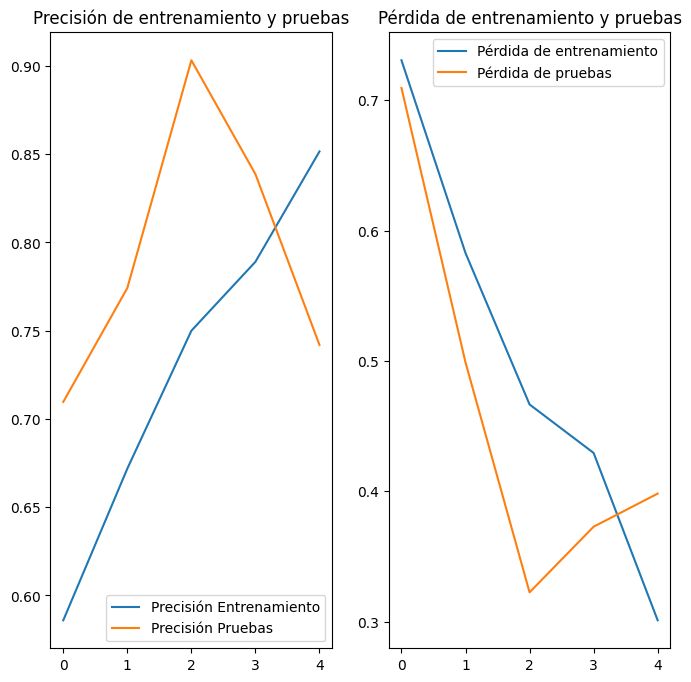

In [47]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [52]:
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255
  print(img)

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1), prediccion


In [54]:
url = 'https://www.infobae.com/new-resizer/cydmo6bXtZh2LTZdPTLPCA2RDzM=/992x1323/filters:format(webp):quality(85)/s3.amazonaws.com/arc-wordpress-client-uploads/infobae-wp/wp-content/uploads/2017/01/13104122/estres-corazon-1920-2.jpg'
prediccion = categorizar (url)
print(prediccion)

[[[0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]]

 [[0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]]

 [[0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]
  [0.83921569 0.83921569 0.83921569]]

 ...

 [[0.78823529 0.79607843 0.79215686]
  [0.78823529 0.79607843 0.79215686]
  [0.79215686 0.8        0.79607843]
  ...
  [0.51372549 0.54117647 0.58039216]
  [0.51372549 0.54117647 0.58039216]
  [0.51372549 0.54117647 0.58039216]]

 [[0.78823529 0.79607843 0.79215686]
  [0.78823529 0.79607843 0.79215686]


In [55]:
modelo.save('mm/modelo_entrenado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
!mkdir mm


mkdir: cannot create directory ‘mm’: File exists


In [57]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import load_model

In [58]:
with tf.keras.utils.custom_object_scope({'KerasLayer': hub.KerasLayer}):
    modelo_cargado = load_model('mm/modelo_entrenado.h5')